# IMPORT

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from preprocess import preprocess
import plotly.express as px
import shutil
from sklearn_pandas import DataFrameMapper
import sqlite3 as sq
import os
%matplotlib inline

In [2]:
df = pd.read_csv('../data/profiles_revised.csv')
df.columns = df.columns.str.replace('\t', '') # needed?
origin = df.columns

In [3]:
if os.path.exists('./exploration/'):
    shutil.rmtree('./exploration/', ignore_errors=True)

In [4]:
def print_col_values(list, filename):
    with open(r'{}.txt'.format(filename), 'w') as fp:
        for element in list:
            fp.write("{}\n".format(element))

In [5]:
def df_distinct_values(df, folder):
    if not os.path.exists(folder):
        os.makedirs('./exploration/'+folder)
    for (index, colname) in enumerate(df.columns):
        #print(index, colname)
        distinc_values = df[colname].unique()
        print_col_values(list=distinc_values, filename='./exploration/{}/{}-{}-values'.format(folder, index, colname))

In [6]:
df_distinct_values(df=df, folder='origin')

In [7]:
profile = ProfileReport(df, title='Pandas Profilign Report')
profile.to_notebook_iframe()
profile.to_file('./exploration/pandas_profiling_data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# CLEAN

In [8]:
#df = df[['age', 'body_type']]
df_clean = preprocess(df.columns, df)

In [9]:
speaks_cols = [
    'speaks_english', 'speaks_spanish', 'speaks_french', 'speaks_c++',
    'speaks_chinese', 'speaks_tagalog', 'speaks_portuguese',
    'speaks_japanese', 'speaks_russian', 'speaks_ukrainian',
    'speaks_sanskrit', 'speaks_thai', 'speaks_hindi', 'speaks_sign',
    'speaks_swedish', 'speaks_german', 'speaks_italian', 'speaks_arabic',
    'speaks_latin', 'speaks_other', 'speaks_hebrew', 'speaks_hawaiian',
    'speaks_korean', 'speaks_ancient', 'speaks_vietnamese',
    'speaks_indonesian', 'speaks_latvian', 'speaks_hungarian',
    'speaks_lisp', 'speaks_swahili', 'speaks_rotuman', 'speaks_czech',
    'speaks_yiddish', 'speaks_greek', 'speaks_catalan', 'speaks_croatian',
    'speaks_farsi', 'speaks_icelandic', 'speaks_tamil', 'speaks_serbian',
    'speaks_esperanto', 'speaks_norwegian', 'speaks_bengali',
    'speaks_dutch', 'speaks_urdu', 'speaks_irish', 'speaks_welsh',
    'speaks_sign_language', 'speaks_khmer', 'speaks_cebuano',
    'speaks_afrikaans', 'speaks_albanian', 'speaks_romanian',
    'speaks_polish', 'speaks_turkish', 'speaks_finnish']

In [10]:
speaks = []
for speaks_col in speaks_cols:
    speaks.append((speaks_col, df_clean[speaks_col].sum()))
print(speaks)

[('speaks_english', 842), ('speaks_spanish', 274), ('speaks_french', 131), ('speaks_c++', 42), ('speaks_chinese', 54), ('speaks_tagalog', 17), ('speaks_portuguese', 11), ('speaks_japanese', 44), ('speaks_russian', 16), ('speaks_ukrainian', 3), ('speaks_sanskrit', 4), ('speaks_thai', 6), ('speaks_hindi', 5), ('speaks_sign', 22), ('speaks_swedish', 5), ('speaks_german', 51), ('speaks_italian', 33), ('speaks_arabic', 11), ('speaks_latin', 5), ('speaks_other', 14), ('speaks_hebrew', 14), ('speaks_hawaiian', 5), ('speaks_korean', 8), ('speaks_ancient', 4), ('speaks_vietnamese', 7), ('speaks_indonesian', 3), ('speaks_latvian', 1), ('speaks_hungarian', 2), ('speaks_lisp', 7), ('speaks_swahili', 1), ('speaks_rotuman', 2), ('speaks_czech', 3), ('speaks_yiddish', 11), ('speaks_greek', 6), ('speaks_catalan', 1), ('speaks_croatian', 1), ('speaks_farsi', 7), ('speaks_icelandic', 2), ('speaks_tamil', 1), ('speaks_serbian', 1), ('speaks_esperanto', 3), ('speaks_norwegian', 2), ('speaks_bengali', 3), 

In [11]:
sorted_speaks = sorted(speaks, key=lambda x: x[1] , reverse=True)
sorted_speaks

[('speaks_english', 842),
 ('speaks_spanish', 274),
 ('speaks_french', 131),
 ('speaks_chinese', 54),
 ('speaks_german', 51),
 ('speaks_japanese', 44),
 ('speaks_c++', 42),
 ('speaks_italian', 33),
 ('speaks_sign', 22),
 ('speaks_sign_language', 22),
 ('speaks_tagalog', 17),
 ('speaks_russian', 16),
 ('speaks_other', 14),
 ('speaks_hebrew', 14),
 ('speaks_portuguese', 11),
 ('speaks_arabic', 11),
 ('speaks_yiddish', 11),
 ('speaks_korean', 8),
 ('speaks_vietnamese', 7),
 ('speaks_lisp', 7),
 ('speaks_farsi', 7),
 ('speaks_thai', 6),
 ('speaks_greek', 6),
 ('speaks_dutch', 6),
 ('speaks_hindi', 5),
 ('speaks_swedish', 5),
 ('speaks_latin', 5),
 ('speaks_hawaiian', 5),
 ('speaks_sanskrit', 4),
 ('speaks_ancient', 4),
 ('speaks_irish', 4),
 ('speaks_afrikaans', 4),
 ('speaks_ukrainian', 3),
 ('speaks_indonesian', 3),
 ('speaks_czech', 3),
 ('speaks_esperanto', 3),
 ('speaks_bengali', 3),
 ('speaks_hungarian', 2),
 ('speaks_rotuman', 2),
 ('speaks_icelandic', 2),
 ('speaks_norwegian', 2),


In [12]:
speaks_cols = [
    'speaks_tagalog', 'speaks_portuguese',
    'speaks_russian', 'speaks_ukrainian',
    'speaks_sanskrit', 'speaks_thai', 'speaks_hindi', 'speaks_sign',
    'speaks_swedish', 'speaks_arabic',
    'speaks_latin', 'speaks_other', 'speaks_hebrew', 'speaks_hawaiian',
    'speaks_korean', 'speaks_ancient', 'speaks_vietnamese',
    'speaks_indonesian', 'speaks_latvian', 'speaks_hungarian',
    'speaks_lisp', 'speaks_swahili', 'speaks_rotuman', 'speaks_czech',
    'speaks_yiddish', 'speaks_greek', 'speaks_catalan', 'speaks_croatian',
    'speaks_farsi', 'speaks_icelandic', 'speaks_tamil', 'speaks_serbian',
    'speaks_esperanto', 'speaks_norwegian', 'speaks_bengali',
    'speaks_dutch', 'speaks_urdu', 'speaks_irish', 'speaks_welsh',
    'speaks_sign_language', 'speaks_khmer', 'speaks_cebuano',
    'speaks_afrikaans', 'speaks_albanian', 'speaks_romanian',
    'speaks_polish', 'speaks_turkish', 'speaks_finnish']

In [13]:
df_clean = df_clean.drop(columns=speaks_cols)

In [14]:
df_clean

age body_type      diet      drinks      drugs  height    income  \
1       36   average     other       often  sometimes    70.0   80000.0   
72      34  athletic  anything    socially  sometimes    73.0  150000.0   
167     25     curvy  anything    socially      never    63.0   20000.0   
189     36       fit  anything  not at all      never    79.0   50000.0   
242     29   average  anything    socially      never    69.0   60000.0   
...    ...       ...       ...         ...        ...     ...       ...   
59513   29  athletic  anything    socially      never    72.0  100000.0   
59516   27      thin  anything    socially  sometimes    72.0   50000.0   
59719   33  athletic  anything       often      never    72.0  100000.0   
59747   24      thin  anything       often  sometimes    60.0   30000.0   
59838   32       fit  anything    socially  sometimes    68.0   50000.0   

                                     job orientation sex  ...  \
1                   hospitality / travel    straight   m  ...   
72           artistic / musical / writer    straight   m  ...   
167          sales / marketing / biz dev         gay   f  ...   
189                entertainment / media    straight   m  ...   
242                    medicine / health    straight   m  ...   
...                                  ...         ...  ..  ...   
59513              entertainment / media    straight   m  ...   
59516  banking / financial / real estate    straight   m  ...   
59719        sales / marketing / biz dev    straight   m  ...   
59747               hospitality / travel    straight   f  ...   
59838                  medicine / health    straight   m  ...   

               religion_modifier                sign_modifier speaks_english  \
1       not too serious about it   no specified sign modifier              1   
72         very serious about it  and it's fun to think about              1   
167            laughing about it  and it's fun to think about              1   
189    somewhat serious about it        but it doesn't matter              1   
242    somewhat serious about it         and it matters a lot              1   
...                          ...                          ...            ...   
59513   not too serious about it        but it doesn't matter              1   
59516          laughing about it        but it doesn't matter              1   
59719  somewhat serious about it  and it's fun to think about              1   
59747  somewhat serious about it        but it doesn't matter              1   
59838          laughing about it  and it's fun to think about              1   

      speaks_spanish speaks_french speaks_c++  speaks_chinese  \
1                  1             1          0               0   
72                 1             0          0               0   
167                0             0          0               0   
189                0             0          0               0   
242                0             0          0               0   
...              ...           ...        ...             ...   
59513              0             0          0               0   
59516              1             0          0               0   
59719              1             0          0               0   
59747              0             0          0               0   
59838              0             1          0               0   

       speaks_japanese  speaks_german  speaks_italian  
1                    0              0               0  
72                   0              0               0  
167                  0              0               0  
189                  0              0               0  
242                  0              0               0  
...                ...            ...             ...  
59513                0              0               0  
59516                0              0               0  
59719                0              0               0  
59747                0 

In [15]:
# TODO: fix '\'
#df_distinct_values(df=df_clean, folder='cleaned')

# SAVE

In [16]:
df_clean.to_csv('./data/cleaned.csv')

# STANDARDIZE

In [17]:
df_clean.head()
sample = df_clean.iloc[:1]

In [18]:
continuous_cols = ['age', 'height']
categorical_cols = ['body_type', 'drinks', 'drugs', 'income', 'job', 'orientation', 'sex', 'smokes', 'status',
'diet','diet_modifier',
'education_status', 'education_institution',
'offspring_status', 'offspring_future',
'pets_cats', 'pets_dogs',
'religion_type', 'religion_modifier',
'sign', 'sign_modifier']
ethnities_cols = df_clean[df_clean.columns[pd.Series(df_clean.columns).str.startswith('ethnicities')]].columns
speaks_cols = df_clean[df_clean.columns[pd.Series(df_clean.columns).str.startswith('speaks')]].columns

In [19]:
# Example
mapper = DataFrameMapper([
  ('body_type', LabelEncoder()),
  (['age'], StandardScaler())],
  #[(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols],
  df_out=True 
)
print(mapper)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[('body_type', LabelEncoder()),
                          (['age'], StandardScaler())])


In [20]:
# Mapper for checking
mapper = DataFrameMapper([
  #('drinks', LabelEncoder()),
  (['age'], StandardScaler())] +
  [(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols],
  df_out=True 
)
print(mapper)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['age'], StandardScaler()),
                          ('body_type', LabelBinarizer()),
                          ('drinks', LabelBinarizer()),
                          ('drugs', LabelBinarizer()),
                          ('income', LabelBinarizer()),
                          ('job', LabelBinarizer()),
                          ('orientation', LabelBinarizer()),
                          ('sex', LabelBinarizer()),
                          ('smokes', LabelBinarizer()),
                          ('status', LabelBinarizer()),
                          ('diet', LabelBinari...
                          ('education_status', LabelBinarizer()),
                          ('education_institution', LabelBinarizer()),
                          ('offspring_status', LabelBinarizer()),
                          ('offspring_future', LabelBinarizer()),
                          ('pets_cats', LabelBinarizer()),
                   

In [21]:
# Real mapper
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +
  [(categorical_col, LabelEncoder()) for categorical_col in categorical_cols] +
  [(ethnities_col, LabelEncoder()) for ethnities_col in ethnities_cols] +
  [(speaks_col, LabelEncoder()) for speaks_col in speaks_cols],
  df_out=True 
)
mapper

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['age'], StandardScaler()),
                          (['height'], StandardScaler()),
                          ('body_type', LabelEncoder()),
                          ('drinks', LabelEncoder()), ('drugs', LabelEncoder()),
                          ('income', LabelEncoder()), ('job', LabelEncoder()),
                          ('orientation', LabelEncoder()),
                          ('sex', LabelEncoder()), ('smokes', LabelEncoder()),
                          ('status', LabelEncoder()), ('diet'...
                          ('sign', LabelEncoder()),
                          ('sign_modifier', LabelEncoder()),
                          ('ethnicities_native_american', LabelEncoder()),
                          ('ethnicities_hispanic_/_latin', LabelEncoder()),
                          ('ethnicities_middle_eastern', LabelEncoder()),
                          ('ethnicities_black', LabelEncoder()),
                          ('ethnicities_pacific_islander', LabelEncoder()),
                          ('ethnicities_indian', LabelEncoder()),
                          ('ethnicities_asian', LabelEncoder()), ...])

In [22]:
df_std = np.round(mapper.fit_transform(df_clean.copy()),2)

In [23]:
table_names = ['okcupid_clean', 'okcupid_std']
#table_path = './data/'+ table_name +'_db'

dfs = {
    "std_clean": df_clean,
    "dt_std": df_std,
}

with sq.connect('okcupid.sqlite') as db:
    df_clean.to_sql('okcupid_clean', db, if_exists='replace', index=True)
    df_std.to_sql('okcupid_std', db, if_exists='replace', index=True)


In [24]:
sample

age body_type   diet drinks      drugs  height   income  \
1   36   average  other  often  sometimes    70.0  80000.0   

                    job orientation sex  ...         religion_modifier  \
1  hospitality / travel    straight   m  ...  not too serious about it   

                sign_modifier speaks_english speaks_spanish speaks_french  \
1  no specified sign modifier              1              1             1   

  speaks_c++  speaks_chinese  speaks_japanese  speaks_german  speaks_italian  
1          0               0                0              0               0  

[1 rows x 40 columns]

In [25]:
np.round(mapper.transform(sample), 2)

age  height  body_type  drinks  drugs  income  job  orientation  sex  \
1  0.49    0.33          2       2      2       6    8            2    1   

   smokes  ...  ethnicities_white  ethnicities_other  speaks_english  \
1       0  ...                  1                  0               0   

   speaks_spanish  speaks_french  speaks_c++  speaks_chinese  speaks_japanese  \
1               1              1           0               0                0   

   speaks_german  speaks_italian  
1              0               0  

[1 rows x 40 columns]

In [26]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/43554821/feature-preprocessing-of-both-continuous-and-categorical-variables-of-integer-t
# https://stackoverflow.com/questions/53152627/saving-standardscaler-model-for-use-on-new-datasets?noredirect=1&lq=1
# https://stackoverflow.com/questions/38780302/predicting-new-data-using-sklearn-after-standardizing-the-training-data

# Exploration

/var/folders/6t/npdrfffx6c531151yzynz4lr0000gn/T/ipykernel_45597/3526068180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, annot=True)


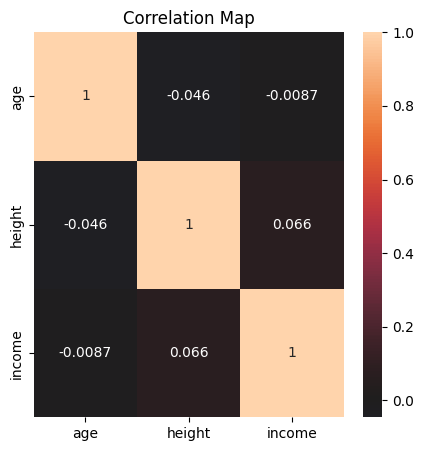

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show()
plt.savefig('./exploration/correlation-map.png')

In [28]:
#plt.figure(figsize=(5,5))
#sns.pairplot(data=df, hue='lables', palette='RdBu')
#plt.title('Correlation Map')
#plt.show()
#plt.savefig('./exploration/pairplot.pdf')

In [29]:
if not os.path.exists('./exploration/features'):
        os.makedirs('./exploration/features')
# TAKES FOREVER
for n_index, column in enumerate(df_std.columns):
    for m_index, column_iterator in enumerate(df_std.columns):
        pass
        print(n_index, column, m_index, column_iterator)
        plt.figure(figsize=(5, 5))
        plt.scatter(df_std.iloc[:, n_index], df_std.iloc[:, m_index])
        plt.xlabel(column)
        plt.ylabel(column_iterator)
        plt.title('Feature {} vs. Feature {}'.format(column, column_iterator))
        filename = '{}-{}-scatter.pdf'.format(column, column_iterator)
        filename = filename.replace('/', '-')
        plt.savefig('./exploration/features/{}'.format(filename))
        plt.close()

0 age 0 age
0 age 1 height
0 age 2 body_type
0 age 3 drinks
0 age 4 drugs
0 age 5 income
0 age 6 job
0 age 7 orientation
0 age 8 sex
0 age 9 smokes
0 age 10 status
0 age 11 diet
0 age 12 diet_modifier
0 age 13 education_status
0 age 14 education_institution
0 age 15 offspring_status
0 age 16 offspring_future
0 age 17 pets_cats
0 age 18 pets_dogs
0 age 19 religion_type
0 age 20 religion_modifier
0 age 21 sign
0 age 22 sign_modifier
0 age 23 ethnicities_native_american
0 age 24 ethnicities_hispanic_/_latin
0 age 25 ethnicities_middle_eastern
0 age 26 ethnicities_black
0 age 27 ethnicities_pacific_islander
0 age 28 ethnicities_indian
0 age 29 ethnicities_asian
0 age 30 ethnicities_white
0 age 31 ethnicities_other
0 age 32 speaks_english
0 age 33 speaks_spanish
0 age 34 speaks_french
0 age 35 speaks_c++
0 age 36 speaks_chinese
0 age 37 speaks_japanese
0 age 38 speaks_german
0 age 39 speaks_italian
1 height 0 age
1 height 1 height
1 height 2 body_type
1 height 3 drinks
1 height 4 drugs
1 he

/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


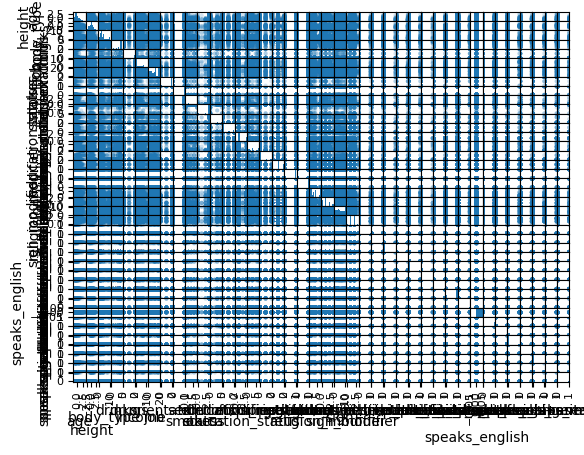

In [30]:
# TAKES FOREVER
pd.plotting.scatter_matrix(df_std, alpha=0.2)
plt.savefig('./exploration/correlation-map.pdf')

# PCA

In [31]:
pca = PCA()
pca.fit(df_std)
var_ratio = pca.explained_variance_ratio_

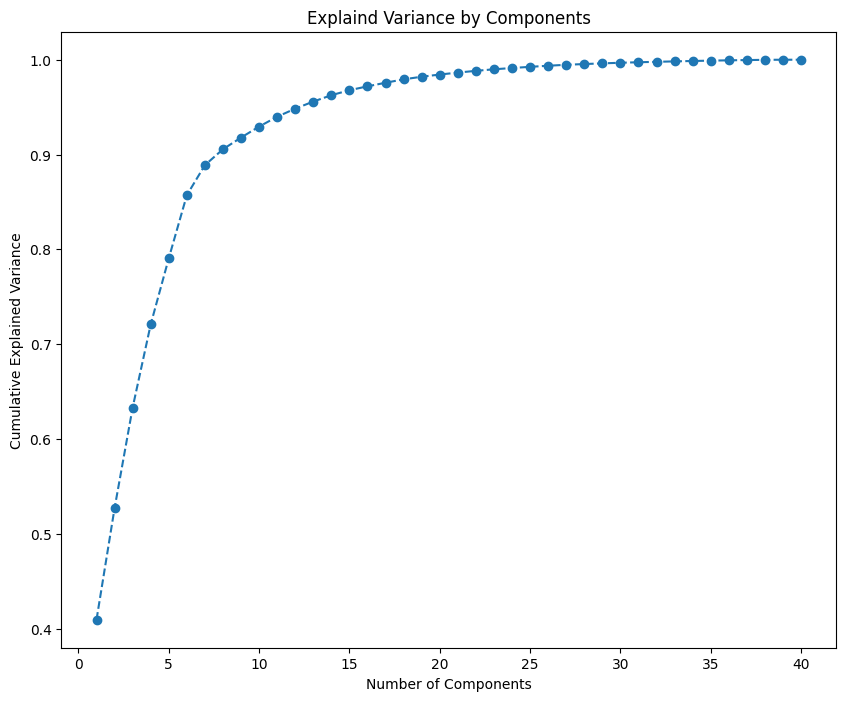

In [32]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(var_ratio)+1), var_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explaind Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
fig.savefig('./exploration/variance-by-principal-components.pdf')

In [33]:
PCA_COMPONENTS = 4

In [34]:
pca = PCA(n_components=PCA_COMPONENTS)
pca.fit(df_std)
scores_pca = pca.transform(df_std)
print(scores_pca)

[[ 1.87635025 -2.47588524  2.70503994 -2.45227461]
 [10.0923121   2.37474251  3.38039722 -1.99763119]
 [-6.51788004 -2.0064482  -1.99873619 -0.2417078 ]
 ...
 [-5.5711731   4.0281529   4.50333101  0.2061127 ]
 [ 1.38951158 -1.38999312 -3.65531102 -3.69001771]
 [-0.11965565  4.72913986 -1.1956264   3.5231477 ]]


In [35]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=420)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

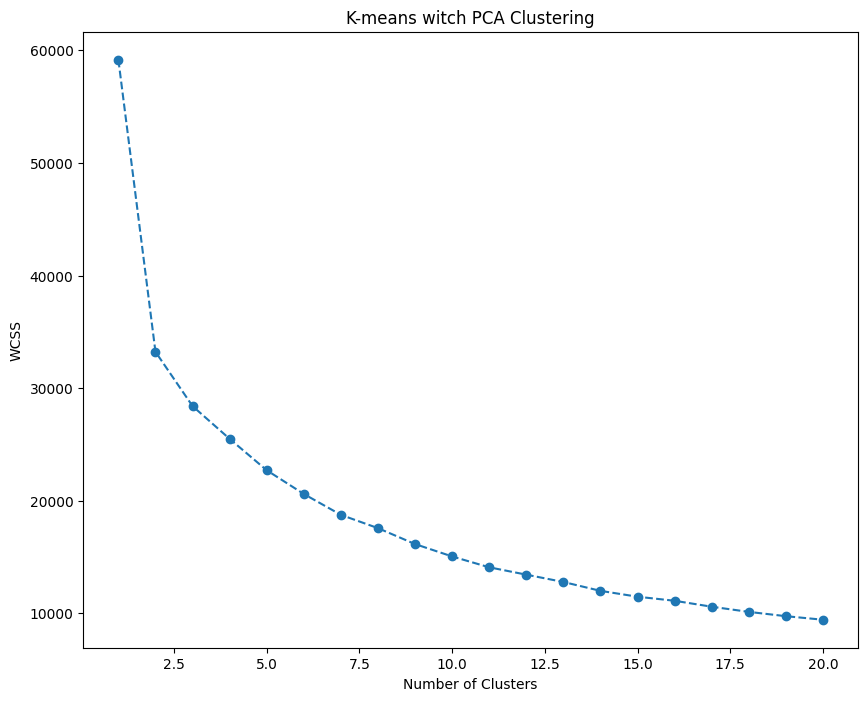

In [36]:
fig = plt.figure(figsize = (10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('K-means witch PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
fig.savefig('./exploration/number-of-clusters.pdf')

In [37]:
OPTIMAL_N_CLUSTER = 4

In [38]:
kmeans_pca = KMeans(n_clusters=OPTIMAL_N_CLUSTER, init='k-means++', random_state=420)
kmeans_pca.fit(scores_pca)

/Users/nicolashuber/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=420)

In [39]:
df_segm_pca_kmeans = pd.concat([df_std.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-PCA_COMPONENTS:] = ['PComp 1', 'PComp 2', 'PComp 3', 'PComp 4']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [40]:
df_segm_pca_kmeans

age  height  body_type  drinks  drugs  income  job  orientation  sex  \
0    0.49    0.33          2       2      2       6    8            2    1   
1    0.29    1.12          1       4      2       8    0            2    1   
2   -0.62   -1.51          3       4      0       0   16            1    0   
3    0.49    2.69          4       1      0       3    6            2    1   
4   -0.21    0.07          2       4      0       4   10            2    1   
..    ...     ...        ...     ...    ...     ...  ...          ...  ...   
837 -0.21    0.86          1       4      0       7    6            2    1   
838 -0.42    0.86          9       4      2       3    1            2    1   
839  0.19    0.86          1       2      0       7   16            2    1   
840 -0.72   -2.29          9       2      2       1    8            2    0   
841  0.09   -0.19          4       4      2       3   10            2    1   

     smokes  ...  speaks_c++  speaks_chinese  speaks_japanese  speaks_german  \
0         0  ...           0               0                0              0   
1         0  ...           0               0                0              0   
2         0  ...           0               0                0              0   
3         0  ...           0               0                0              0   
4         0  ...           0               0                0              0   
..      ...  ...         ...             ...              ...            ...   
837       0  ...           0               0                0              0   
838       0  ...           0               0                0              0   
839       0  ...           0               0                0              0   
840       4  ...           0               0                0              0   
841       0  ...           0               0                0              0   

     speaks_italian    PComp 1   PComp 2   PComp 3   PComp 4  \
0                 0   1.876350 -2.475885  2.705040 -2.452275   
1                 0  10.092312  2.374743  3.380397 -1.997631   
2                 0  -6.517880 -2.006448 -1.998736 -0.241708   
3                 0   4.015947  5.000456 -0.926335 -3.429703   
4                 0  -0.427045 -3.657631  1.326143  1.634620   
..              ...        ...       ...       ...       ...   
837               0   4.221542  5.011639  2.939646  1.484176   
838               0   9.040204  1.797940 -1.873004 -4.000953   
839               0  -5.571173  4.028153  4.503331  0.206113   
840               0   1.389512 -1.389993 -3.655311 -3.690018   
841               0  -0.119656  4.729140 -1.195626  3.523148   

     Segment K-means PCA  
0                      1  
1                      3  
2                      0  
3                      2  
4                      1  
..                   ...  
837                    3  
838                    2  
839                    0  
840                    1  
841                    1  

[842 rows x 45 columns]

In [41]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth'
})

In [42]:
df_segm_pca_kmeans.head()

age  height  body_type  drinks  drugs  income  job  orientation  sex  \
0  0.49    0.33          2       2      2       6    8            2    1   
1  0.29    1.12          1       4      2       8    0            2    1   
2 -0.62   -1.51          3       4      0       0   16            1    0   
3  0.49    2.69          4       1      0       3    6            2    1   
4 -0.21    0.07          2       4      0       4   10            2    1   

   smokes  ...  speaks_chinese  speaks_japanese  speaks_german  \
0       0  ...               0                0              0   
1       0  ...               0                0              0   
2       0  ...               0                0              0   
3       0  ...               0                0              0   
4       0  ...               0                0              0   

   speaks_italian    PComp 1   PComp 2   PComp 3   PComp 4  \
0               0   1.876350 -2.475885  2.705040 -2.452275   
1               0  10.092312  2.374743  3.380397 -1.997631   
2               0  -6.517880 -2.006448 -1.998736 -0.241708   
3               0   4.015947  5.000456 -0.926335 -3.429703   
4               0  -0.427045 -3.657631  1.326143  1.634620   

   Segment K-means PCA  Segment  
0                    1   second  
1                    3   fourth  
2                    0    first  
3                    2    third  
4                    1   second  

[5 rows x 46 columns]

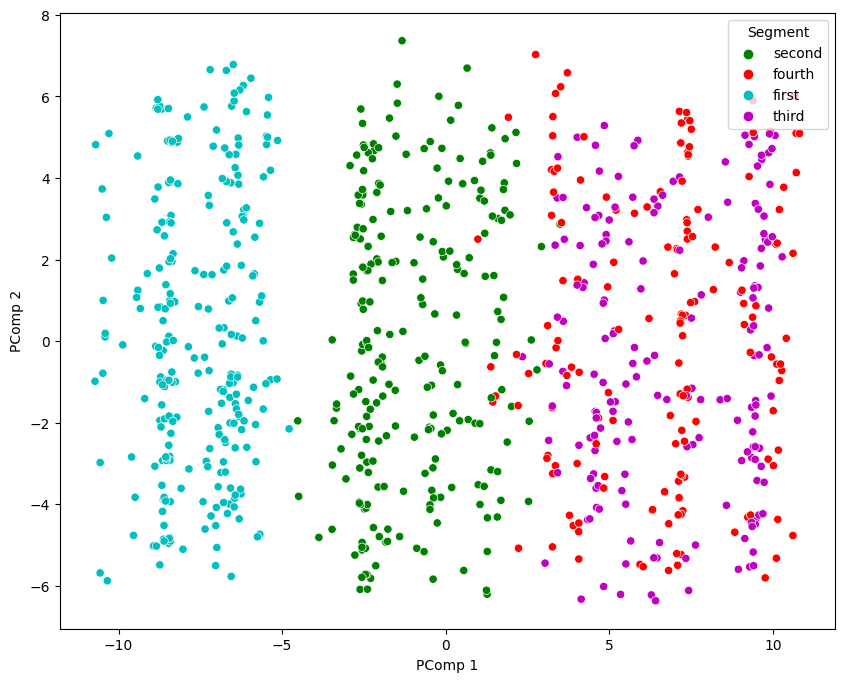

In [43]:
x_axis = df_segm_pca_kmeans['PComp 1']
y_axis = df_segm_pca_kmeans['PComp 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])
plt.show()

In [44]:
df_cluster = df_segm_pca_kmeans.iloc[:,-6:] # 4 components + hue + cat
df_cluster.head

<bound method NDFrame.head of        PComp 1   PComp 2   PComp 3   PComp 4  Segment K-means PCA Segment
0     1.876350 -2.475885  2.705040 -2.452275                    1  second
1    10.092312  2.374743  3.380397 -1.997631                    3  fourth
2    -6.517880 -2.006448 -1.998736 -0.241708                    0   first
3     4.015947  5.000456 -0.926335 -3.429703                    2   third
4    -0.427045 -3.657631  1.326143  1.634620                    1  second
..         ...       ...       ...       ...                  ...     ...
837   4.221542  5.011639  2.939646  1.484176                    3  fourth
838   9.040204  1.797940 -1.873004 -4.000953                    2   third
839  -5.571173  4.028153  4.503331  0.206113                    0   first
840   1.389512 -1.389993 -3.655311 -3.690018                    1  second
841  -0.119656  4.729140 -1.195626  3.523148                    1  second

[842 rows x 6 columns]>

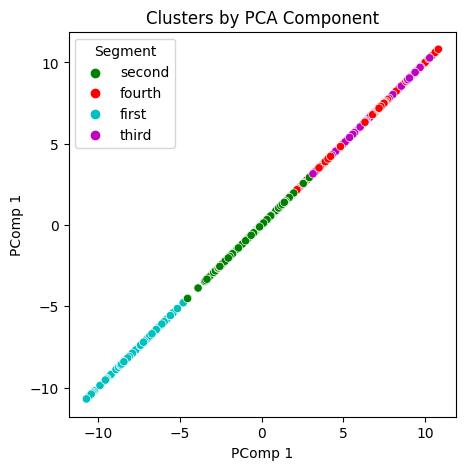

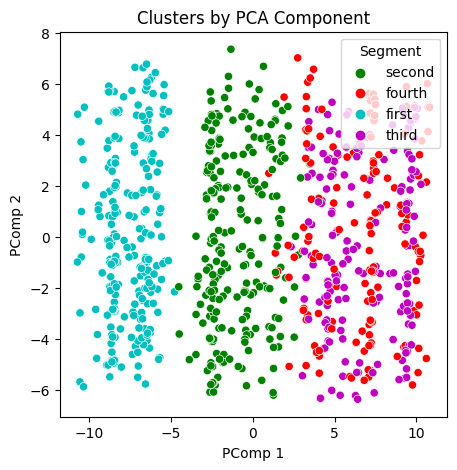

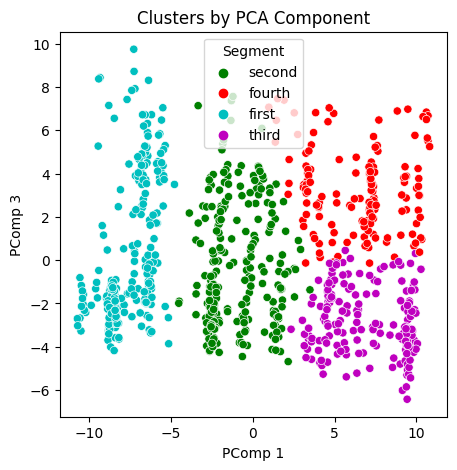

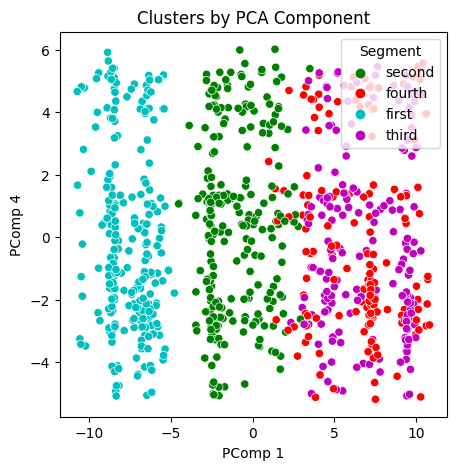

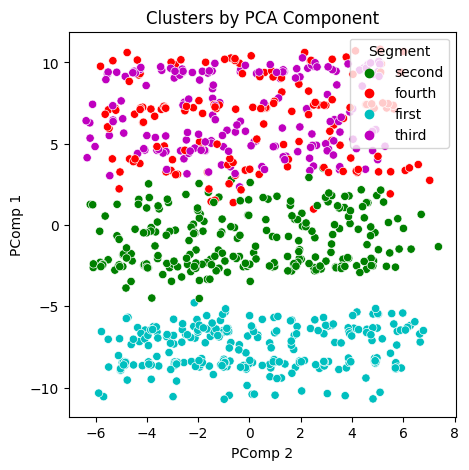

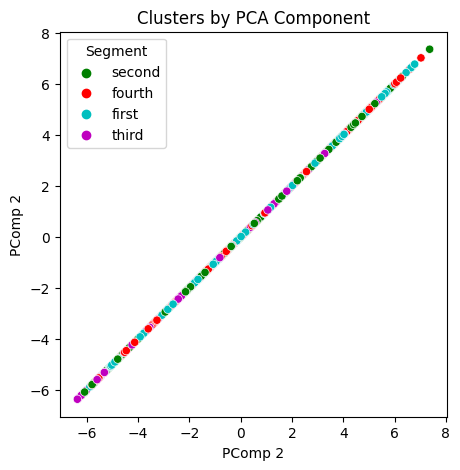

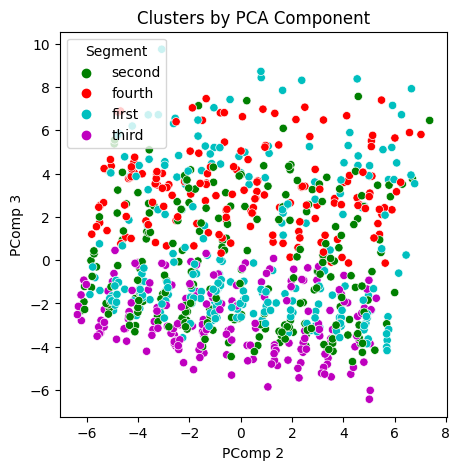

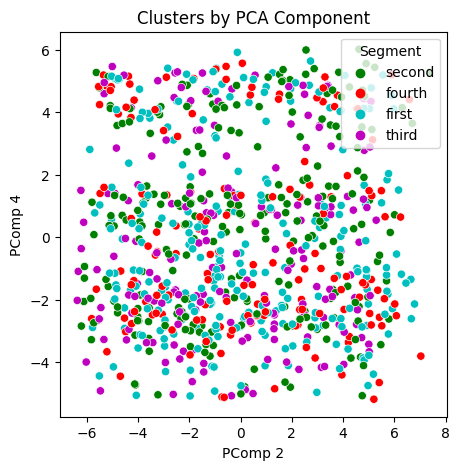

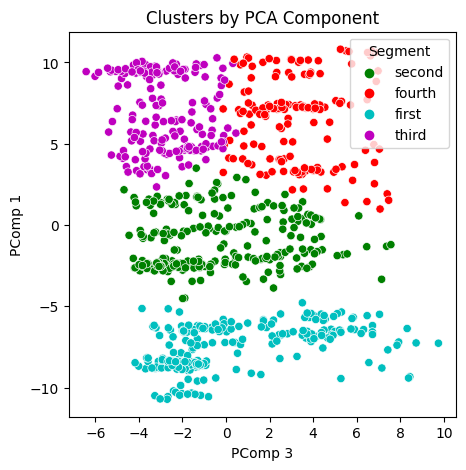

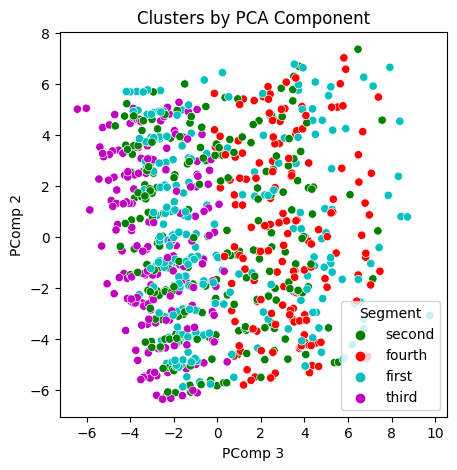

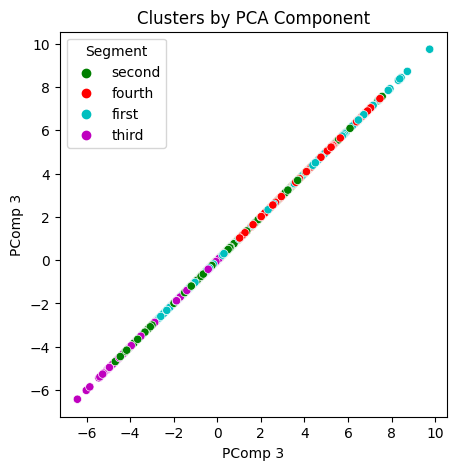

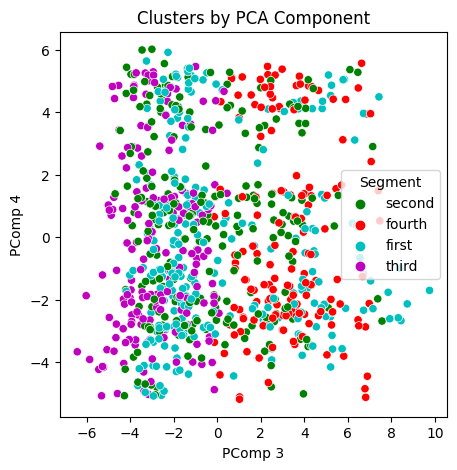

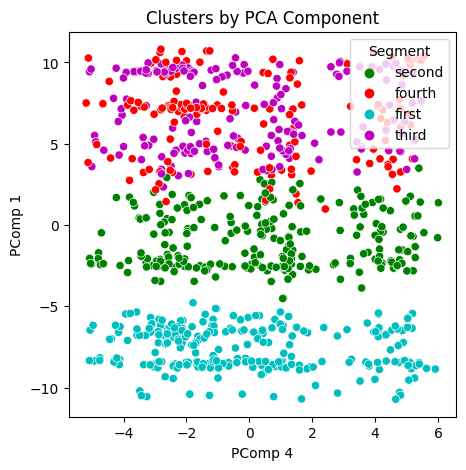

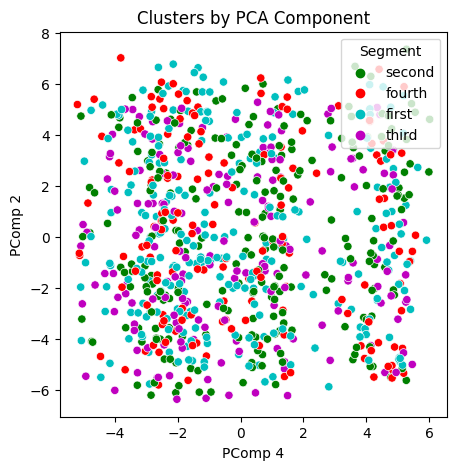

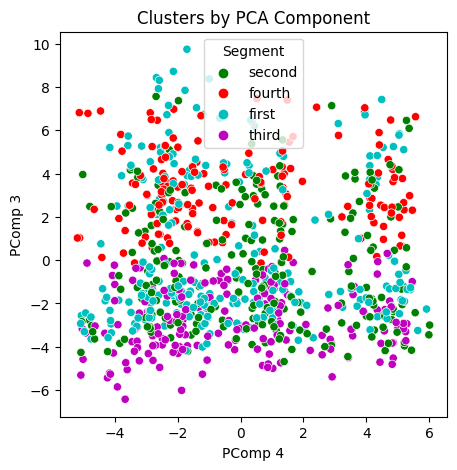

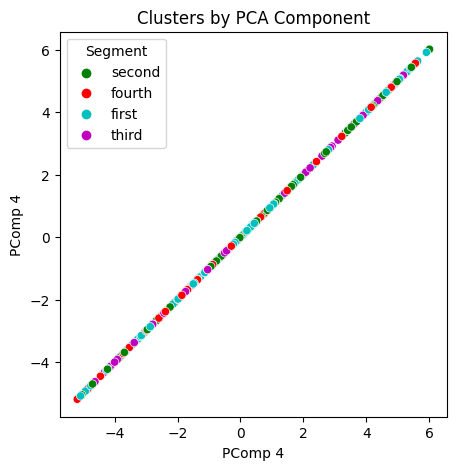

In [45]:
if not os.path.exists('./exploration/PCA'):
        os.makedirs('./exploration/PCA')

for n_index, column in enumerate(df_cluster.columns[:PCA_COMPONENTS]):
    for m_index, column_iterator in enumerate(df_cluster.columns[:PCA_COMPONENTS]):
        #print(n_index, column, m_index, column_iterator)
        fig = plt.figure(figsize=(5, 5))
        sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])
        plt.xlabel(column)
        plt.ylabel(column_iterator)
        plt.title('Clusters by PCA Component')
        fig.savefig('./exploration/PCA/PCA {} vs {}.pdf'.format(column, column_iterator)) 
        #plt.show()

In [46]:
fig = px.scatter(df_cluster, x="PComp 1", y="PComp 2", color='Segment', text=df_cluster.index)
fig.show()